In [30]:
import plotnine
import os
import pandas as pd
from plotnine import *
import numpy as np
pathresults = "../results/"
hW95 = "failedLoopdumux_10c9.5_20mn_0s_1_100/"#"noAdsorptiondumux_10c00dx00010plant20k_9.5_60mn_0s_1_100/" #"dx_2000plant100k_9.5_30mn_0s_7_500/" 
hW125 = "failedLoopdumux_10c12.5_20mn_0s_1_100/"#"dx00010plant20k_9.5_30mn_0s_121_100/"#"dx0010plant20k_9.5_10mn_0s_7_1000/"# "dx_2000plant100k_9.5_30mn_0s_7_1000/" 
lW95BB ="failedLoopdumux_10c9.5_5mn_0s_1_1000/"# "newGIdSetdx0010plant20k_9.5_2mn_0s_121_1000/"#"dx_2000plant100k_9.5_30mn_0s_7_5000/" 
lW95CC ="dx_2000plant100k_9.5_30mn_0s_7_1000/" 
lW95C = "dx_2000plant100k_9.5_1mn_0s_7_14500/" 

data_file_delimiter = ","

In [25]:

def getVal(mypath, filename, header="infer",names = None):
    fullpath = pathresults +mypath+filename
    data_file_delimiter = ","
    if names is None:
        largest_column_count = 0
        with open(fullpath, 'r') as temp_f:
            for line in temp_f:
                last_line = line
                column_count = len(last_line.split(data_file_delimiter)) + 1
                if column_count > largest_column_count:
                    largest_column_count = column_count
        names = [i for i in range(0, largest_column_count)]
        cst = pd.read_csv(fullpath,delimiter=data_file_delimiter, header = header, names = names)
    else:
        cst = pd.read_csv(fullpath,delimiter=data_file_delimiter, header = header, names = names)
    return cst
 
def getValAll(mypath):
    mucil = getVal(mypath,"Q_Mucil_tot.txt" ).sum(axis=1)
    df = pd.DataFrame({'Mucil': mucil})
    df['Exud'] = getVal(mypath,"Q_Exud_tot.txt" ).sum(axis=1)#exudation
    names = ["cs","cl","coa","cod","cca","ccd","css2","co2",'css1']
    for i in range( 9):
        df[names[i]] = getVal(mypath,"Soil_solute_conc"+str(i+1)+".txt").mean(axis=1) 
    
    tt = getVal(mypath, "time.txt")
    df['time'] = tt.iloc[:,0]
    df = pd.melt(df, id_vars=['time'])
    return(df)   

In [36]:
def getImage(path, imagename):
    useIter = False

    dfs = getValAll(path)
    x_val = 'time'

    from plotnine import options
    options.figure_size = (35, 60)
    fig, plot= (
       ggplot(data=dfs)
        +aes(x=x_val, y='value',col ='variable')+
      xlab(x_val)+
      geom_line()+
      #ylab("s_st (mmol/ml)")+#bquote(s[st]~" (mmol/ml)"))+ 
      facet_wrap("variable",scales = "free",ncol =3)+
      theme(legend_text = element_text( size=15),
            legend_title = element_text( size=15),
            legend_position="none",#c(0.5,0.1),
            legend_direction = "horizontal",
            #legend_box = "vertical",
            panel_grid_minor = element_line(colour="white"),
            panel_grid_major = element_line(colour="white"),
            panel_background = element_rect(fill="white", color="black"),
            strip_text_y =element_text( size=15) ,
            axis_text = element_text( size=17),
            axis_title = element_text( size=21),
            strip_background = element_rect(fill="white"),
            strip_text = element_text(size = 21, hjust = 0,face ="bold"),
            subplots_adjust={'wspace':0.15}
            #strip_placement = "inside"
           )
    ).draw(show=True, return_ggplot=True)
    fig.savefig(imagename, dpi=100)#

/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


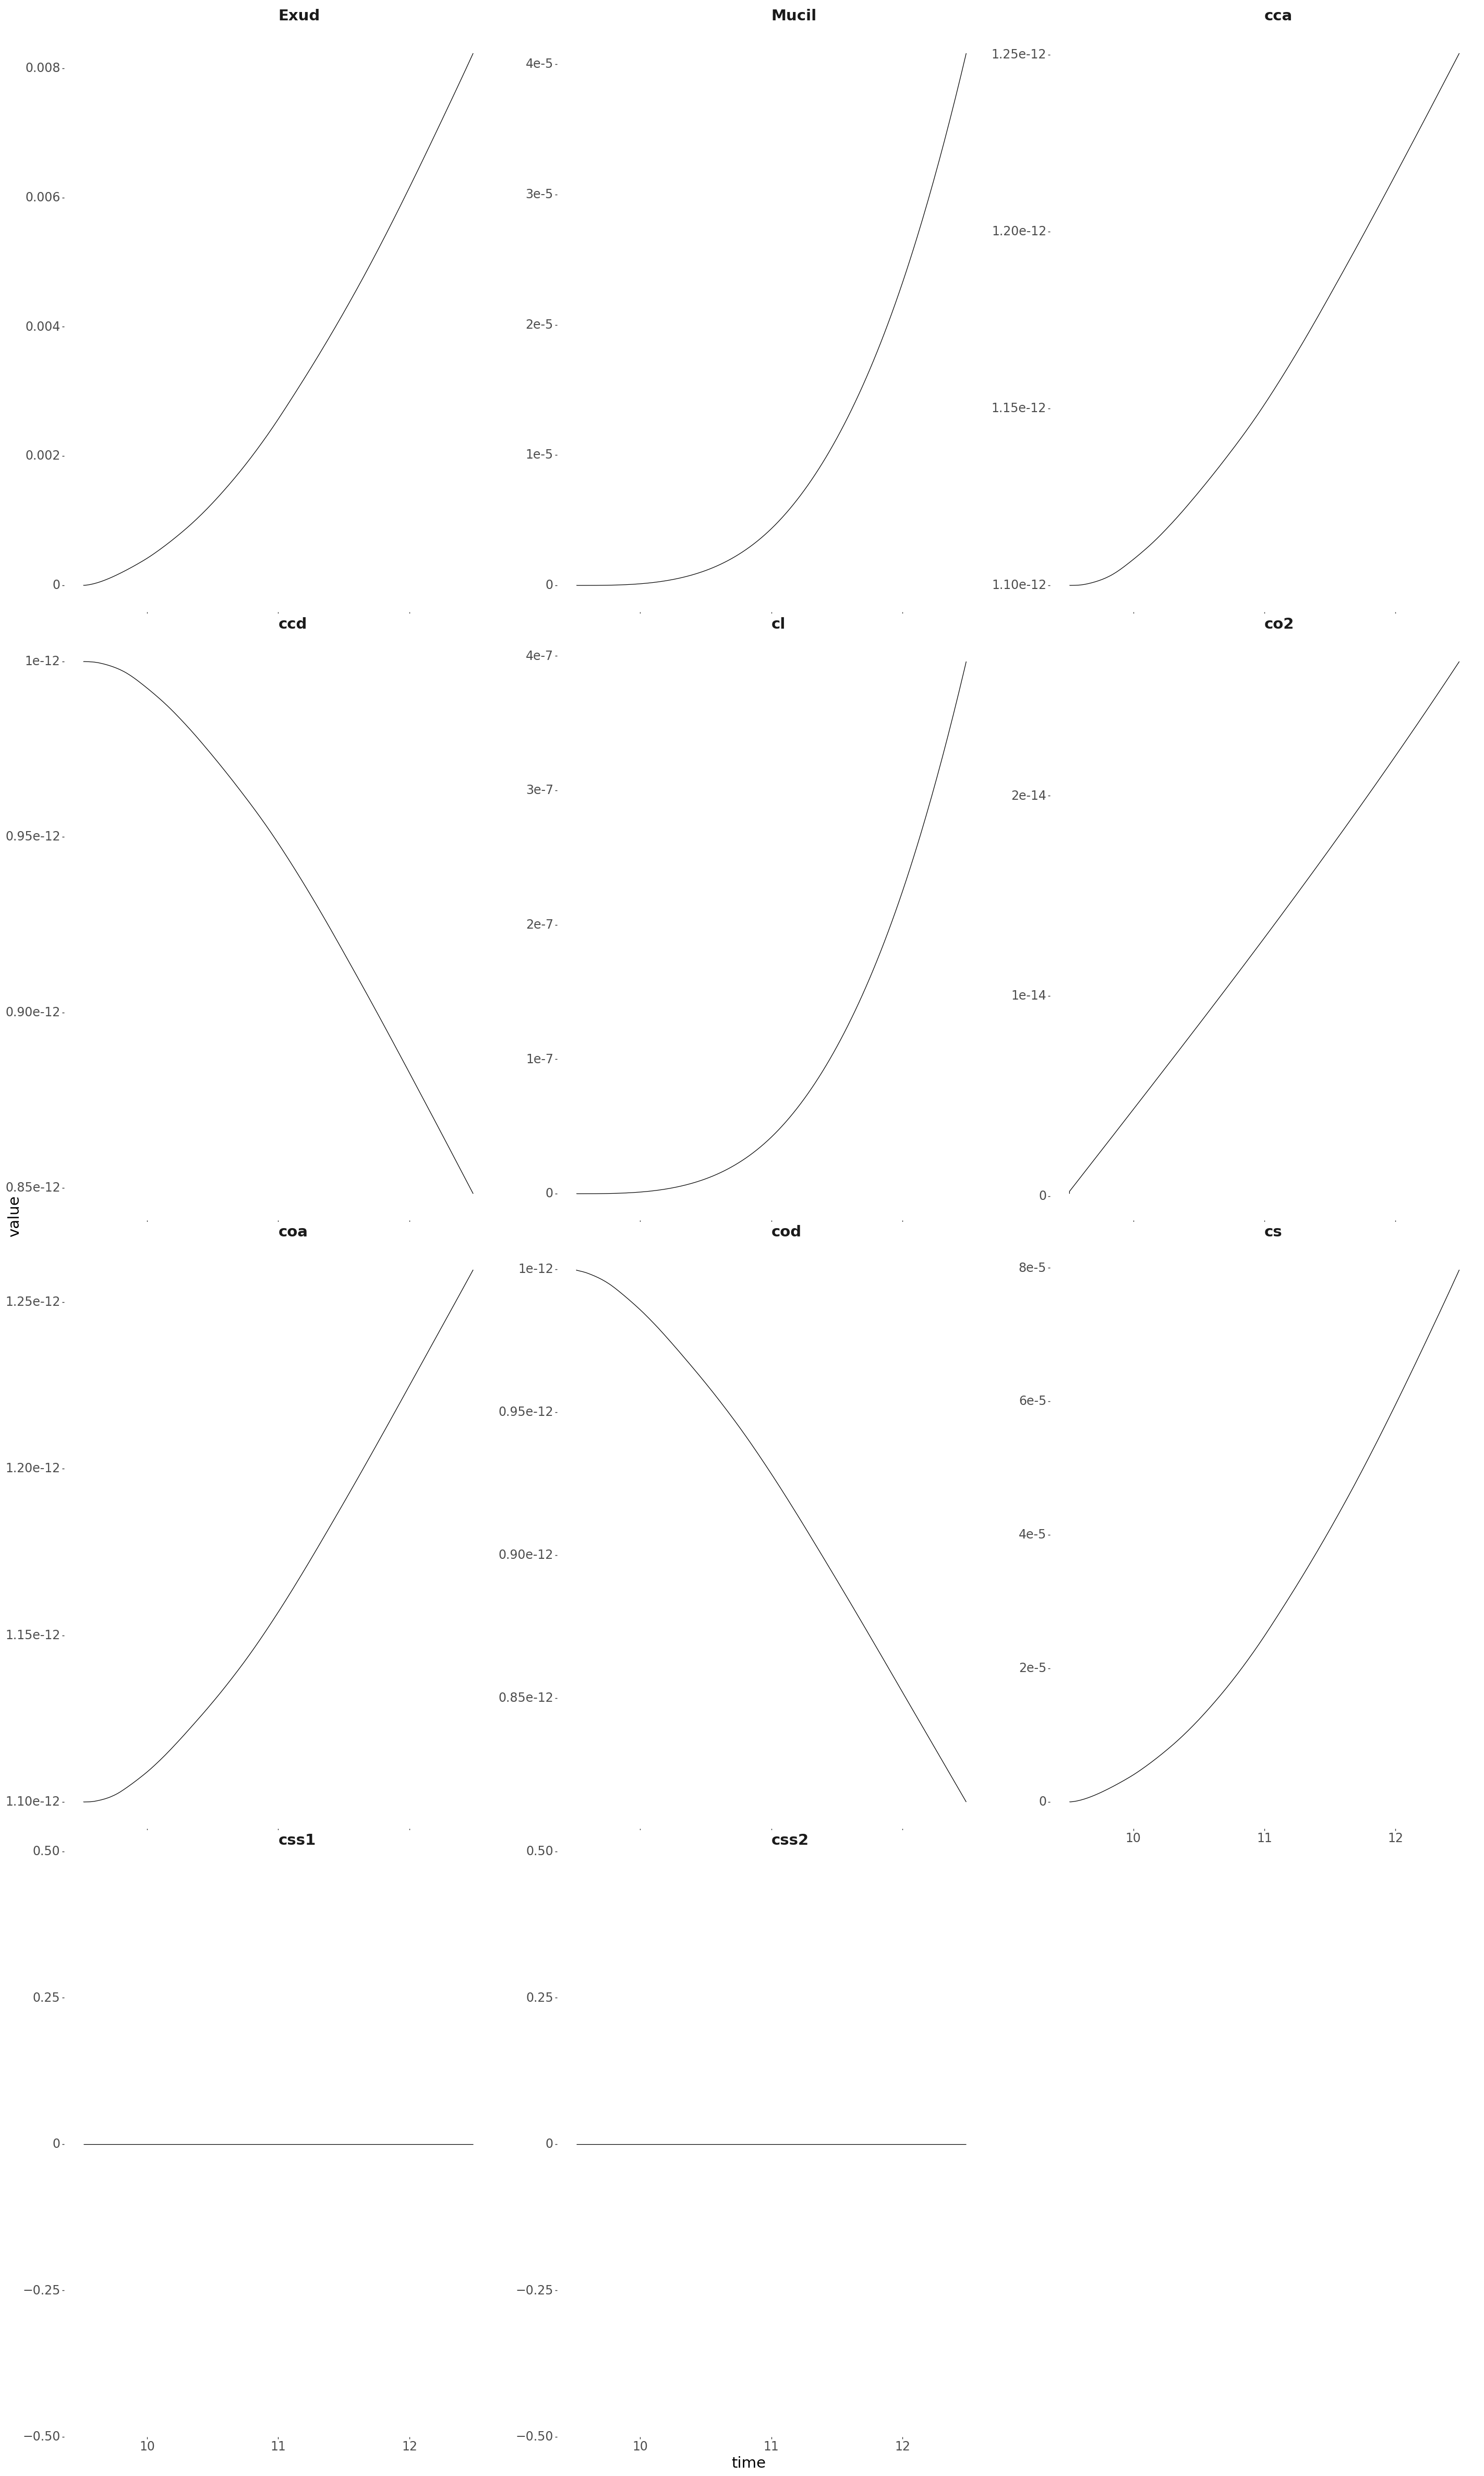

In [37]:
getImage(hW95, 'hW95_Cend.png')

/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


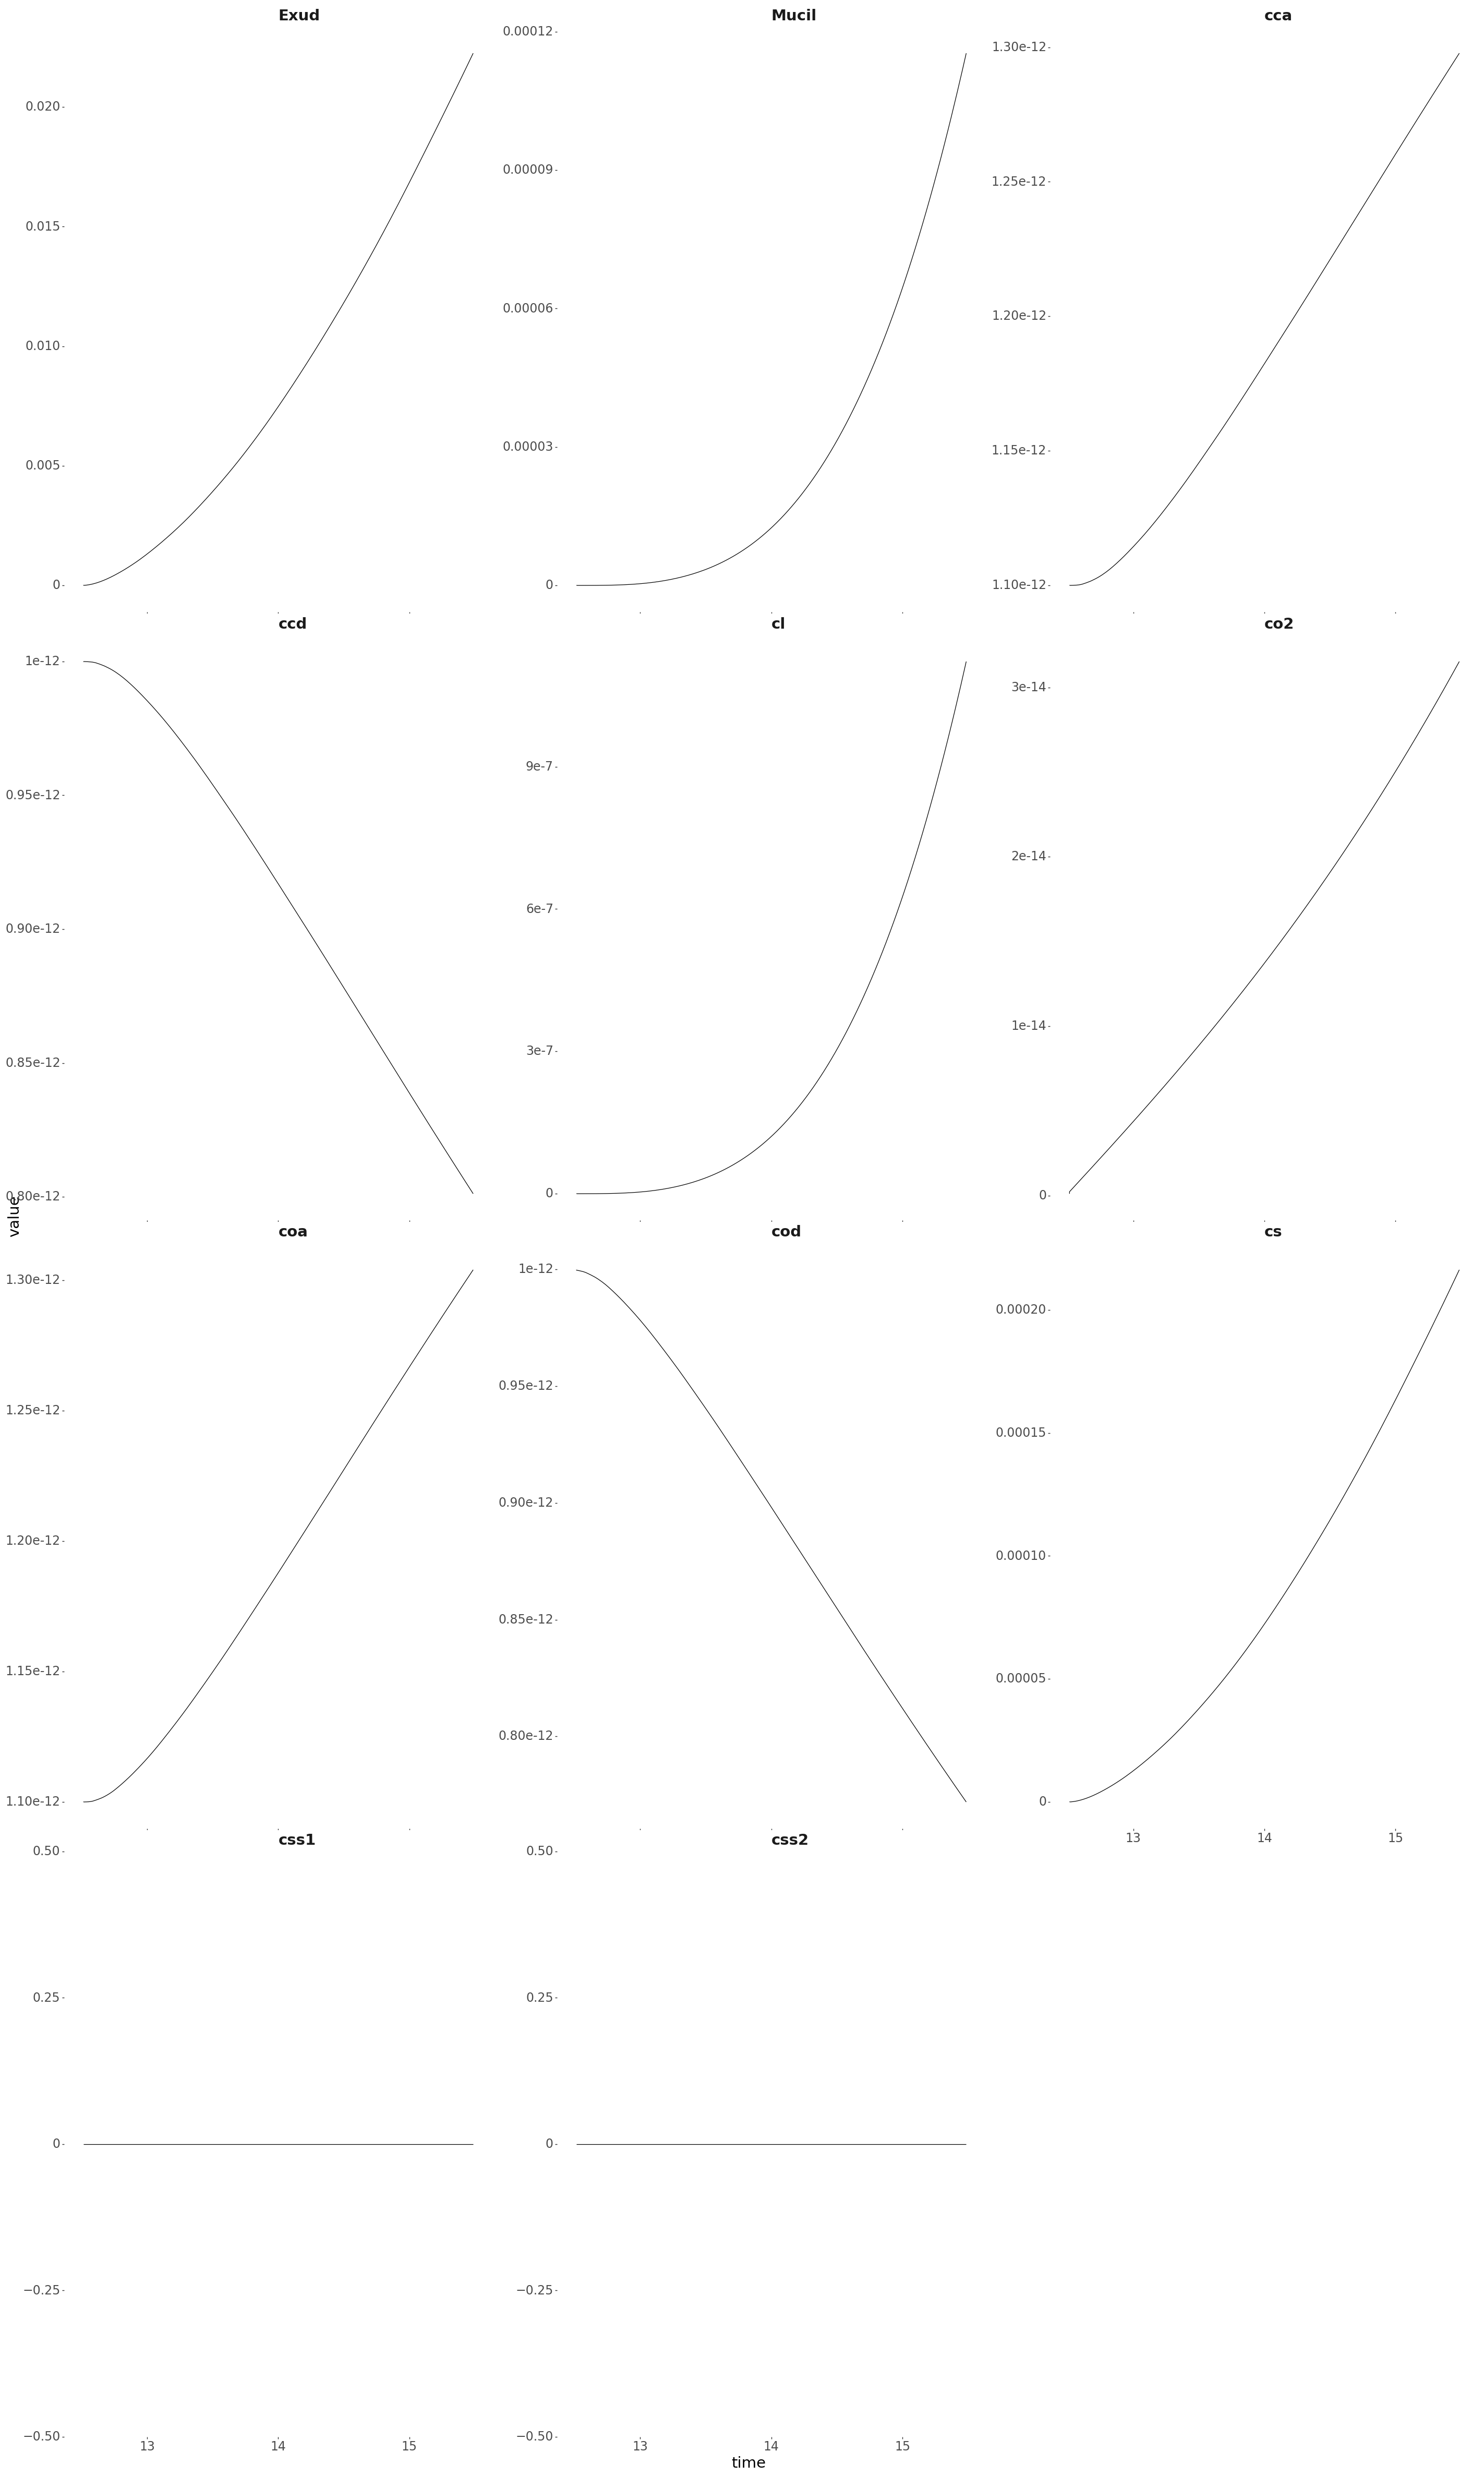

In [38]:
getImage(hW125, 'hW125_Cend.png')

/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


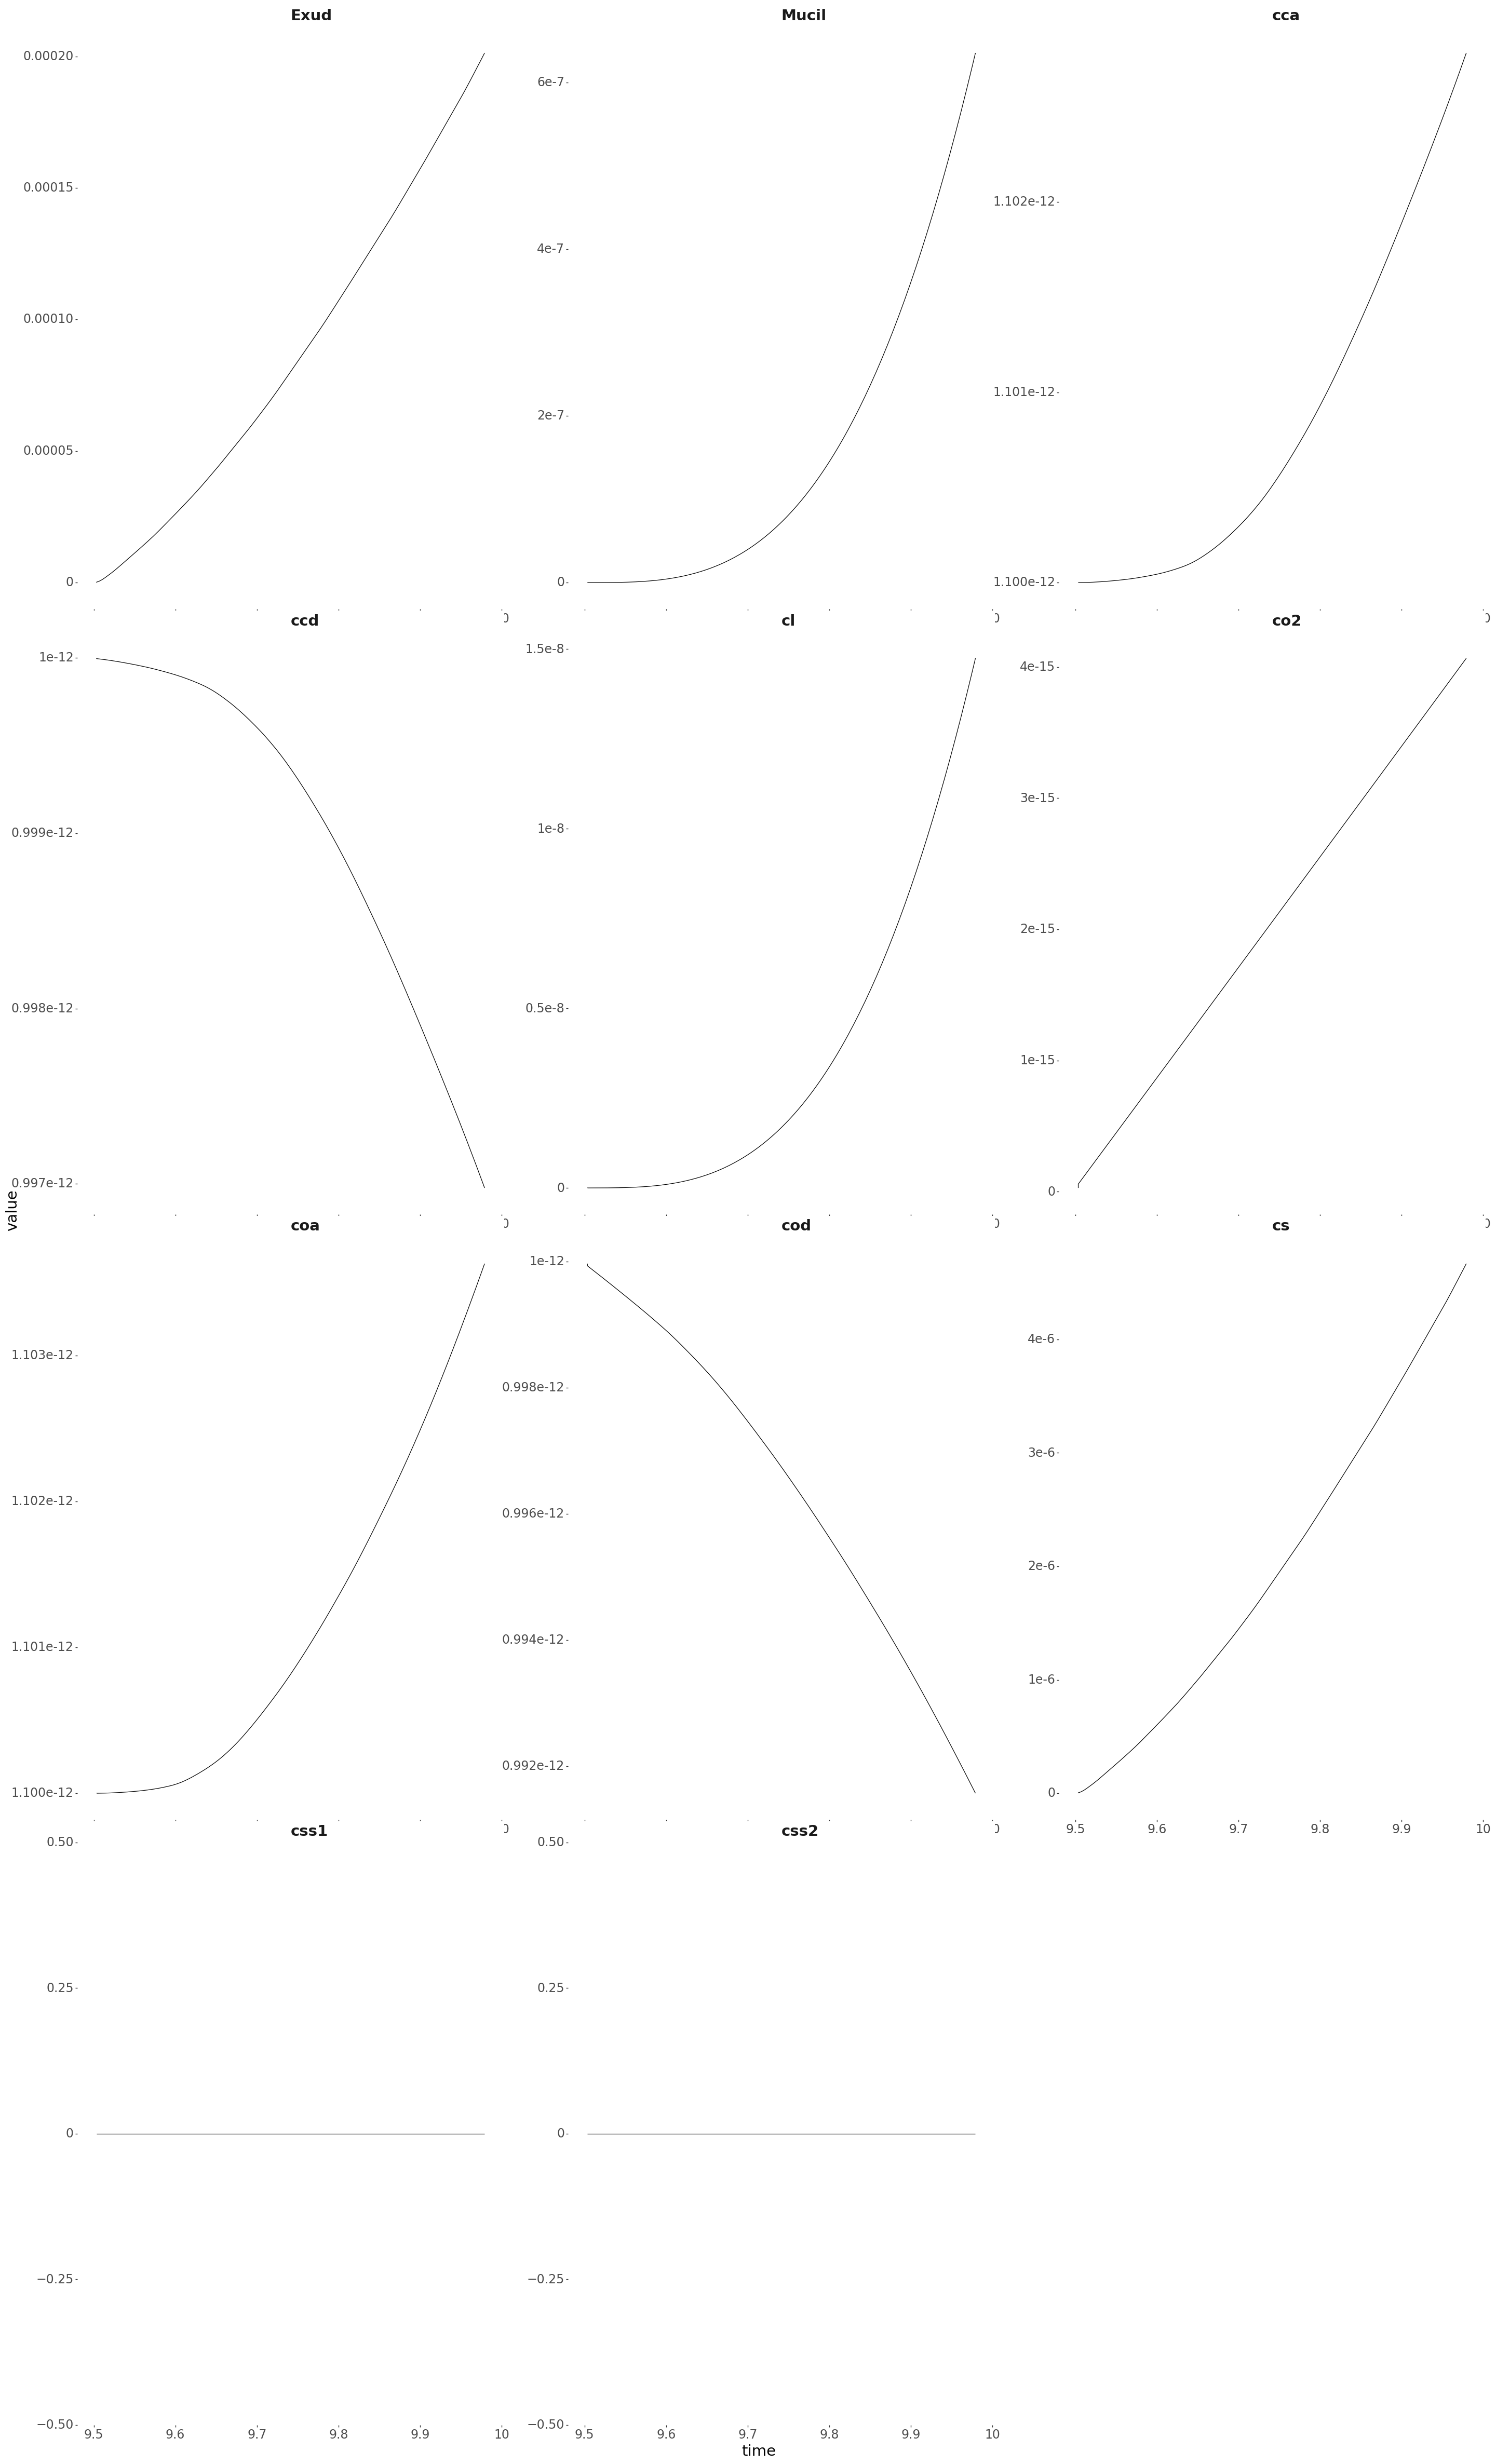

In [39]:
getImage(lW95BB, 'lW95_Cend.png')

/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


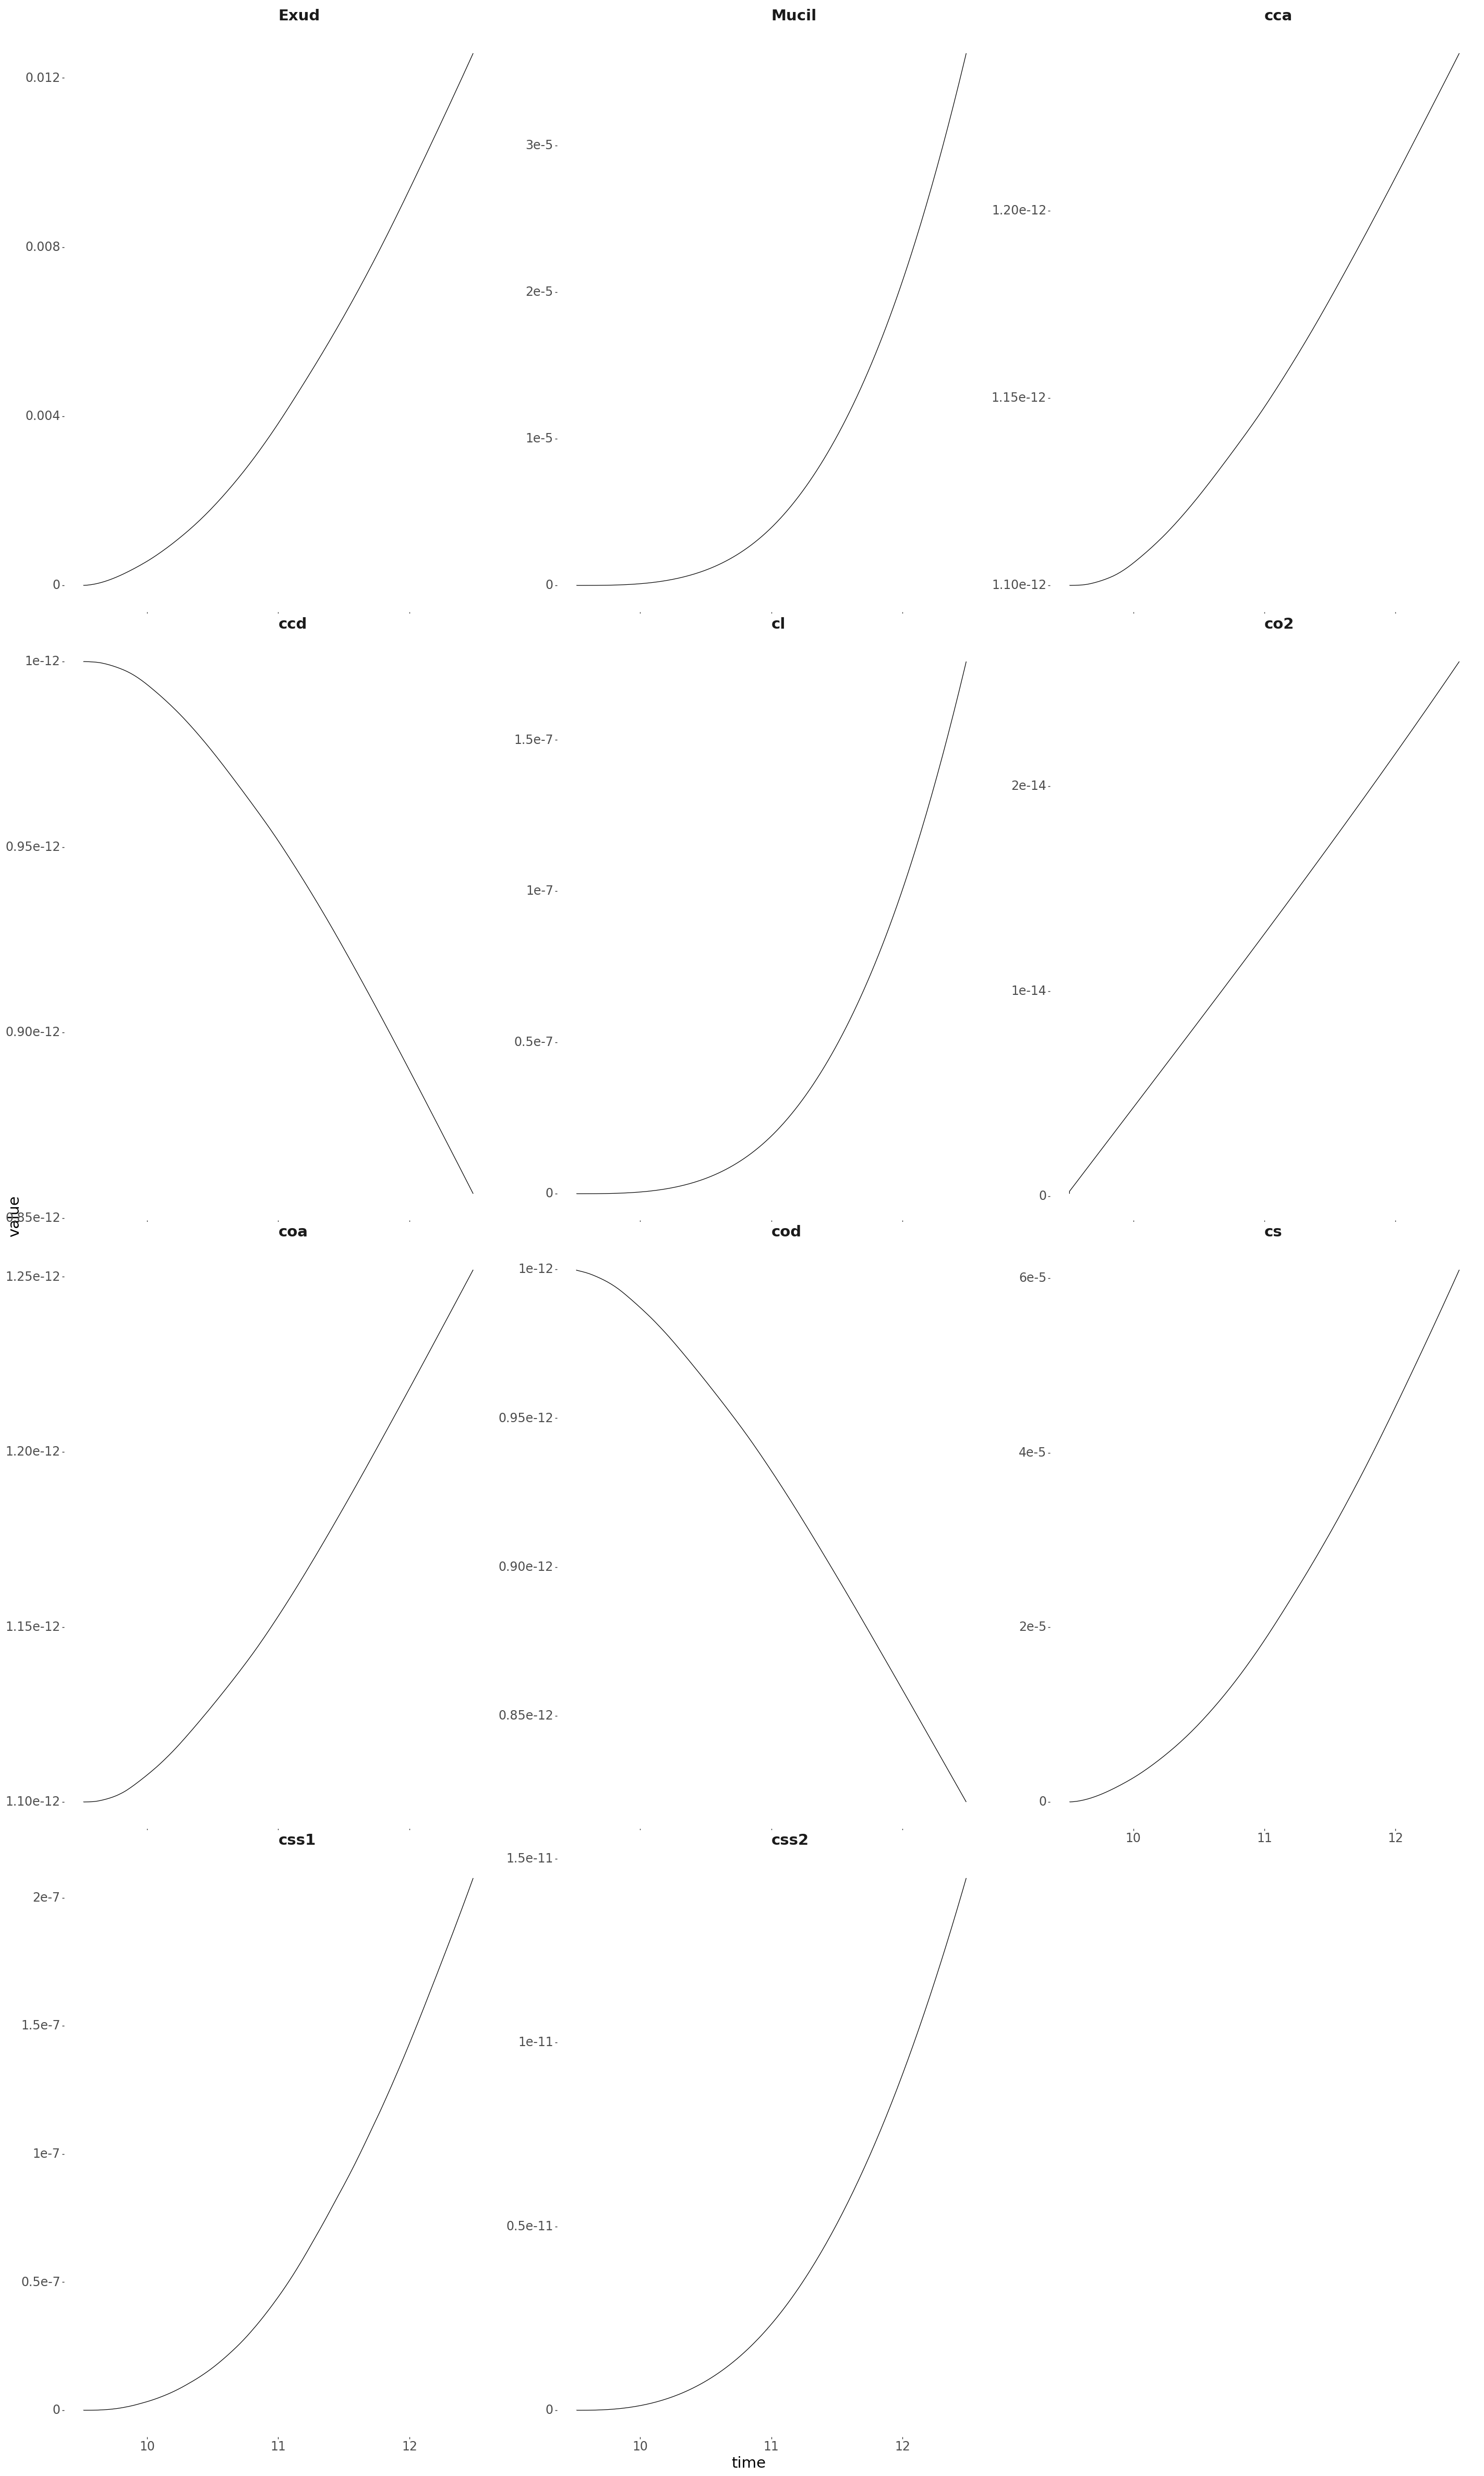

In [40]:
getImage('withAdsdx_2dumux_10c3_9.5_20mn_0s_1_100/', 'hW95_Cendcss.png')

/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


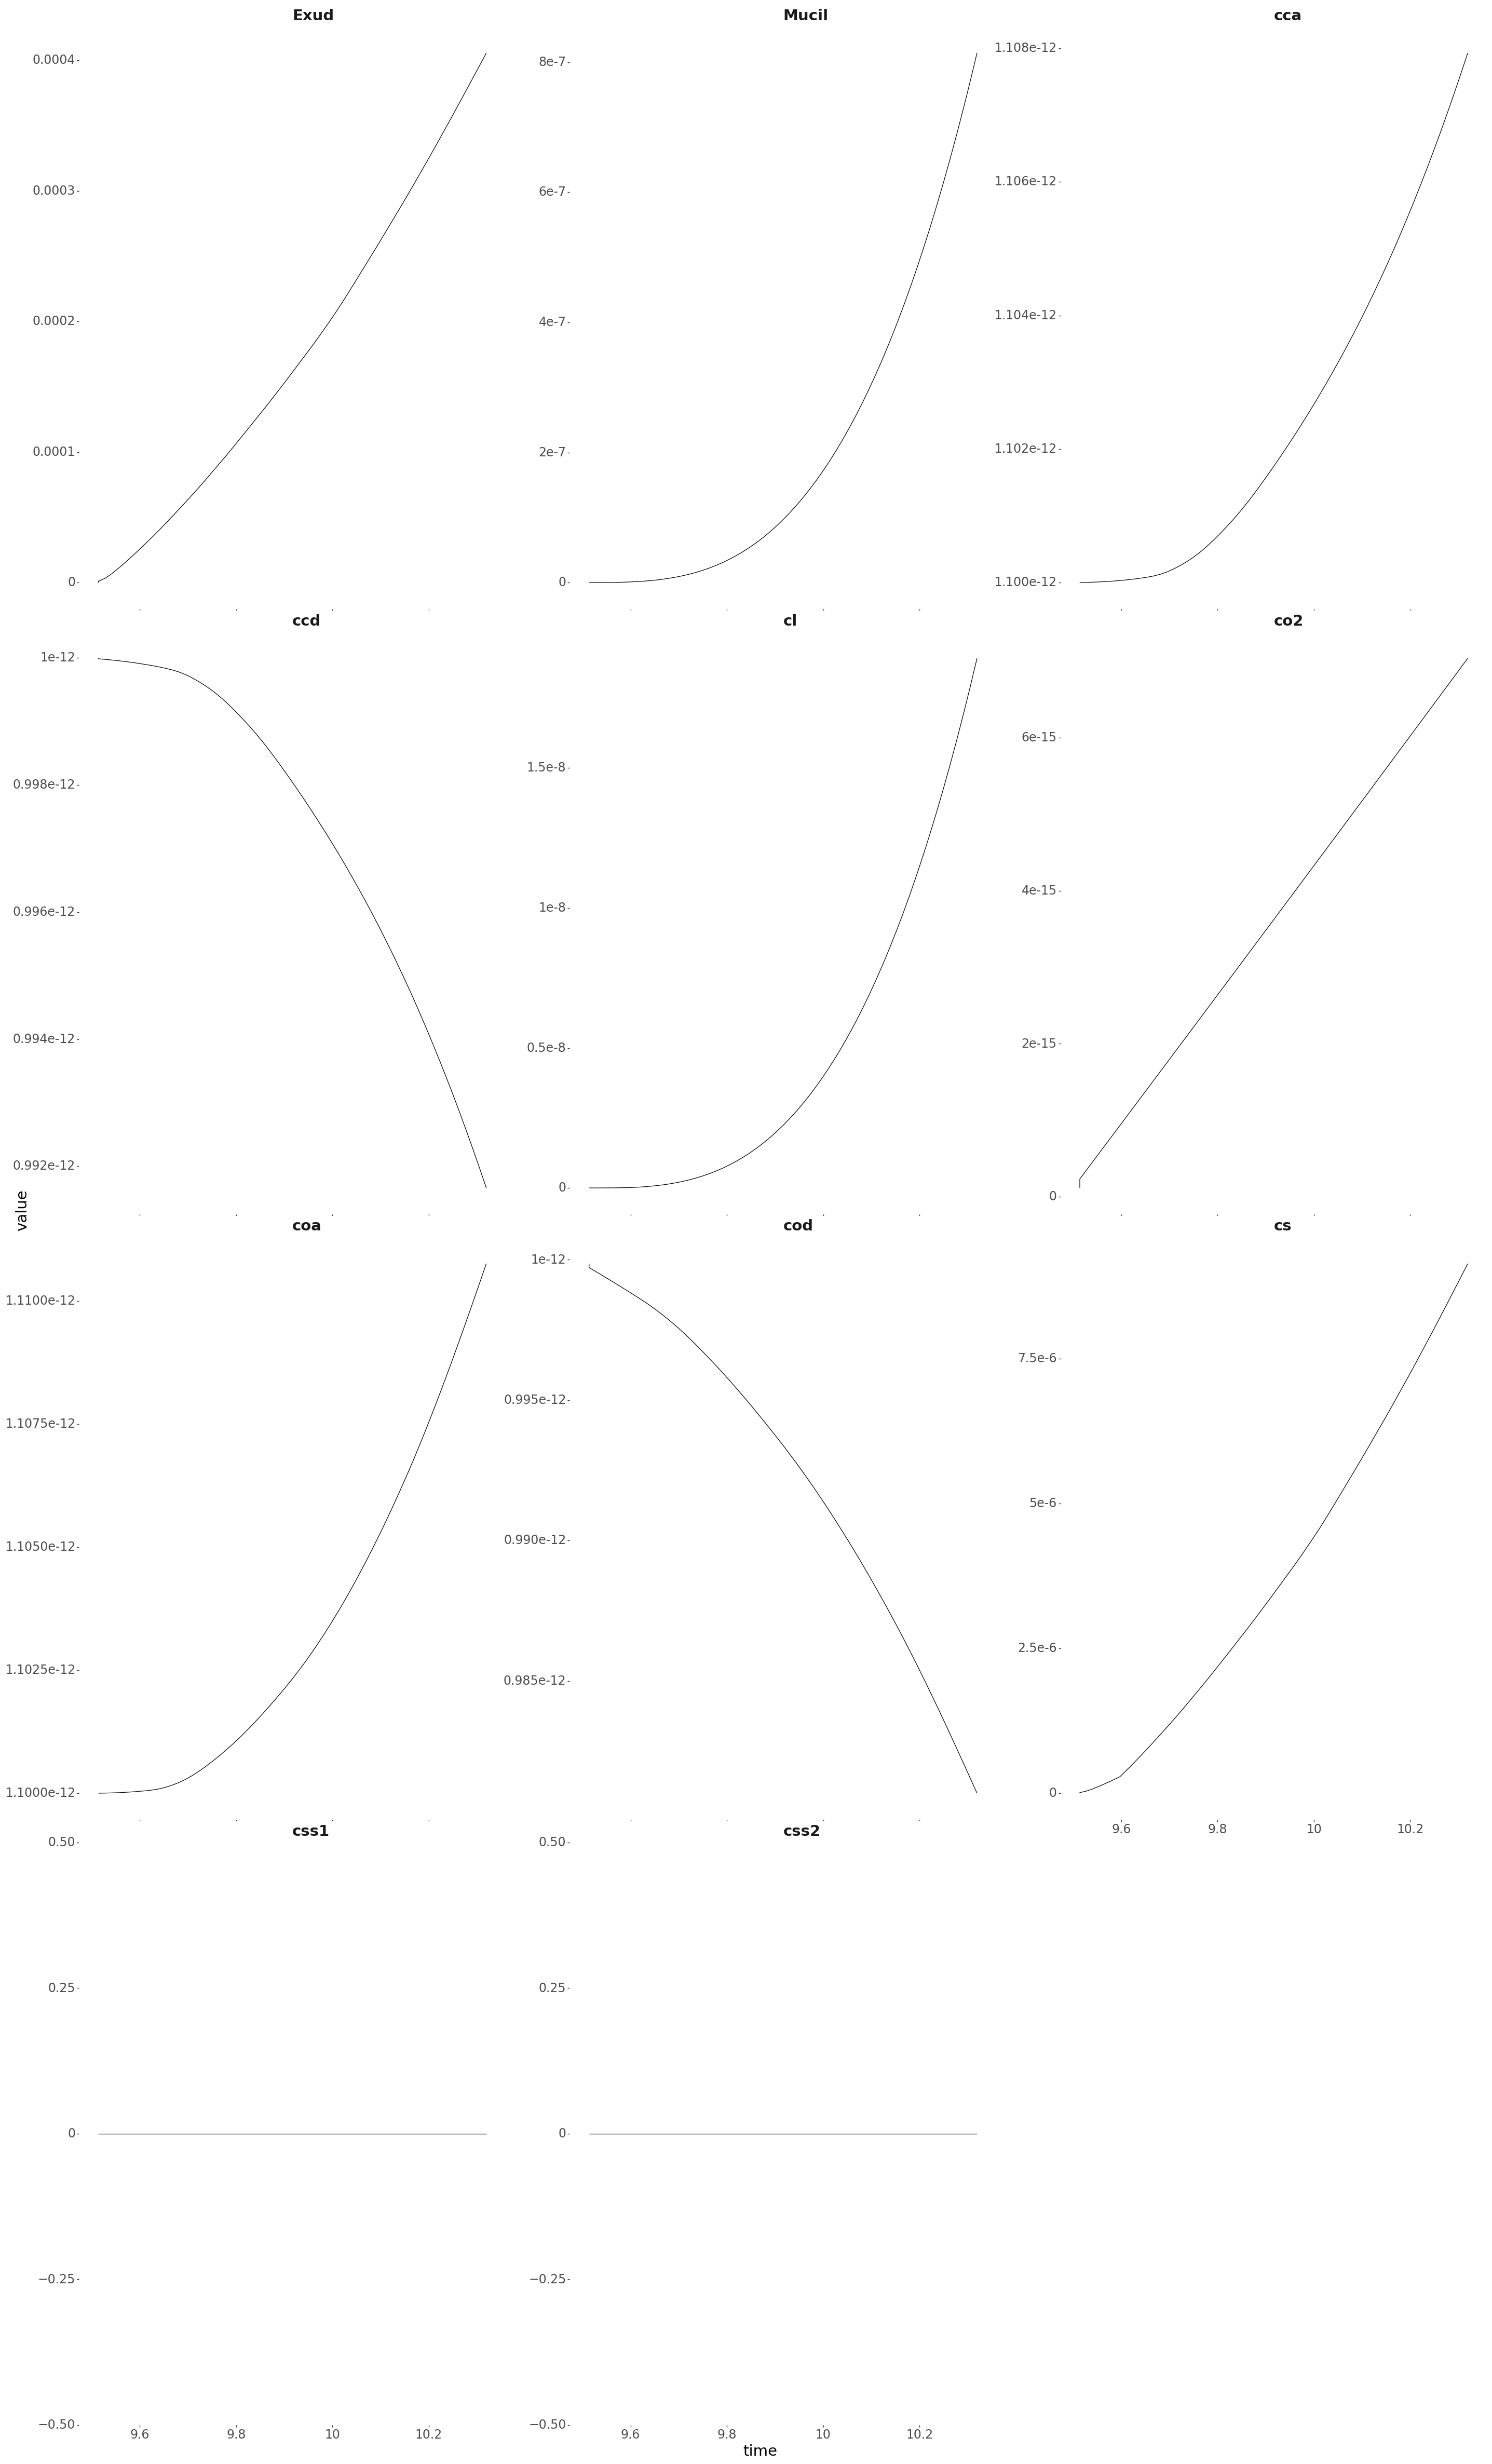

In [41]:
getImage('css2dx_2dumux_10c39.5_20mn_0s_1_1000/','lW9520mn_Cend.png')

In [26]:
maxdiffhead

182.76714138492787

In [28]:
maxdiffhead = 0
for i in range(240):
    try:
        phead  = getVal("hangsdumux_wdx00010plant20k_9.5_30mn_0s_1_1000/","pressureHeadcyl"+str(i)+".txt" )
    except:
        pass
    npphead = phead.tail(1).to_numpy()[0]
    diffhead = abs(npphead[-1] - npphead[0])
    if diffhead > maxdiffhead:
        maxdiffhead = diffhead
maxdiffhead

313.49652907441646